# ***1- Importing Libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# ***2- Importing DataSet***

In [2]:
df = pd.read_csv('MainDataSet.csv')

In [3]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


# ***General information About The Dataset:***

***This dataset is modeled after an existing milling machine***
       
1. Consists of 10,000 row " represents data-points
2. consists of 14-feature or colomn

***Dataset Features***
1. UID: unique identifier ranging from 1 to 10000

2. product ID: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number

3. type: just the product type L, M or H from column 2

4. air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K

5. process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.

6. rotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise

7. torque [Nm]: torque values are normally distributed around 40 Nm with a SD = 10 Nm and no negative values.

8. tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process.

9. a 'machine failure' label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true. 

**The machine failure consists of five independent failure modes**

1. tool wear failure (TWF): the tool will be replaced of fail at a randomly selected tool wear time between 200 - 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).

2. heat dissipation failure (HDF): heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the tools rotational speed is below 1380 rpm. This is the case for 115 data points.

3. power failure (PWF): the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.

4. overstrain failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.

5. random failures (RNF): each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset. If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1. It is therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail.

# ***3- Exploring***

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [5]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [6]:
types = df.dtypes
n_unic=df.nunique()
pd.DataFrame({"Dtypes": types,"n_unic":n_unic}).T

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
Dtypes,int64,object,object,float64,float64,int64,float64,int64,int64,int64,int64,int64,int64,int64
n_unic,10000,10000,3,93,82,941,577,246,2,2,2,2,2,2


In [7]:
df.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Machine failure                2
TWF                            2
HDF                            2
PWF                            2
OSF                            2
RNF                            2
dtype: int64

In [8]:
df['Type'].value_counts()

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

### ***3.1 - Check for null-values***  

In [9]:
pd.DataFrame(df.isnull().sum()).T

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Since There's no null-values, So there's no need to continue in handling null-values

### ***3.2 - Target Distribution***

In [10]:
df['Machine failure'].value_counts(normalize=True)

Machine failure
0    0.9661
1    0.0339
Name: proportion, dtype: float64

### ***3.3 - Feature Distributions***

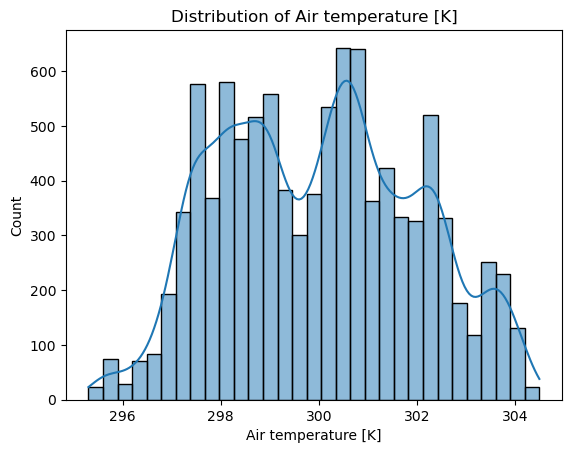

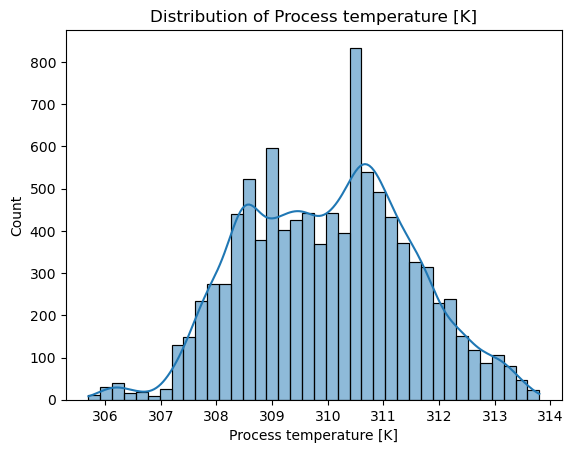

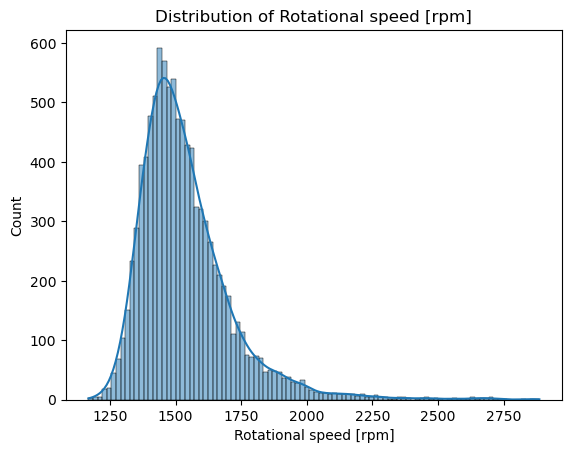

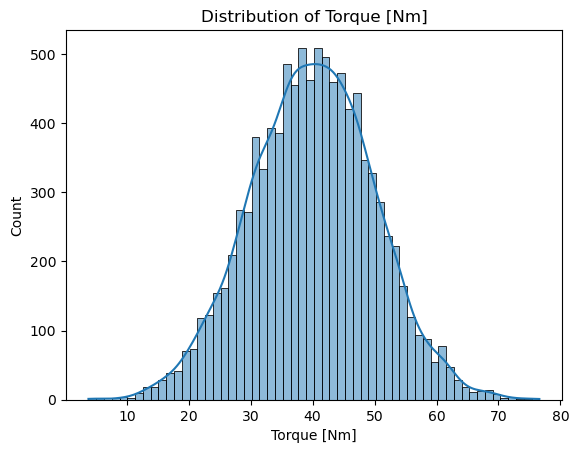

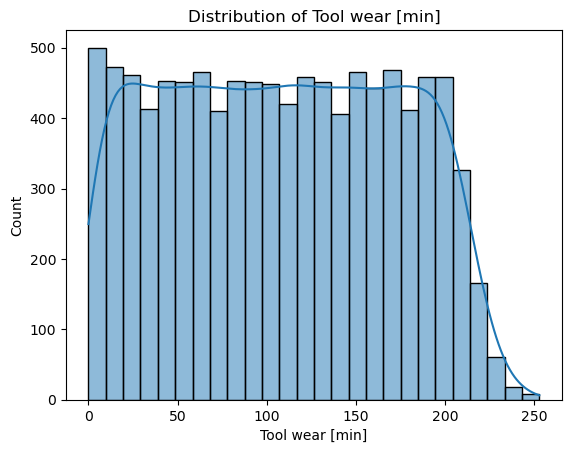

In [11]:
# Plot distributions
numerical = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
for col in numerical:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

### ***3.4 - Correlation***

<Axes: >

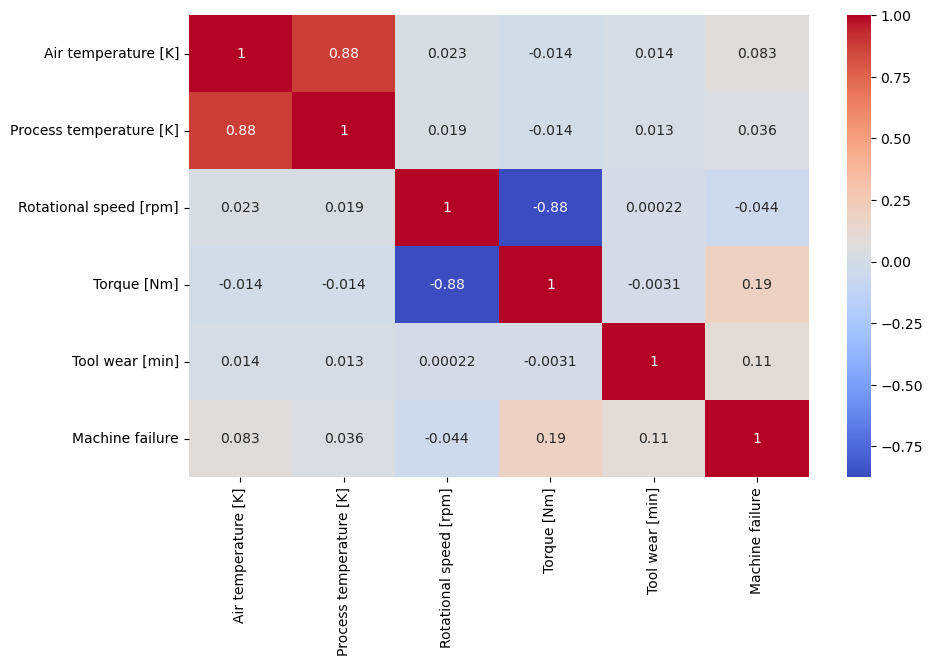

In [12]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical + ['Machine failure']].corr(), annot=True, cmap='coolwarm')

# ***4- Preprocessing***

### ***4.1 - Drop Irrelevant Columns***

In [13]:
# as long as those colomns ['UDI','Product ID'] will be meaningless for the model so dropping them will be the best option
df.drop(columns=['UDI','Product ID'],inplace=True)

### ***4.2 - Encode Categorical Features***

In [14]:
df = pd.get_dummies(df, columns=['Type'], prefix='Type')

### ***4.3 - Handle for outliers***

In [15]:
for col in numerical:
    if col != 'Machine failure':  # Exclude 'Machine failure' from outlier handling
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        df[col] = df[col].clip(lower=Q1 - 1.5*IQR, upper=Q3 + 1.5*IQR)

### ***4.4 - Feature Engineering***

In [16]:
df['Power'] = df['Torque [Nm]'] * df['Rotational speed [rpm]']
df['Temp_diff'] = df['Process temperature [K]'] - df['Air temperature [K]']
df['Tool_wear_squared'] = df['Tool wear [min]'] ** 2

### ***4.5 - Address Class Imbalance (SMOTE)***

In [ ]:
from imblearn.over_sampling import SMOTE

X = df.drop('Machine failure', axis=1)
y = df['Machine failure']
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      10000 non-null  float64
 1   Process temperature [K]  10000 non-null  float64
 2   Rotational speed [rpm]   10000 non-null  float64
 3   Torque [Nm]              10000 non-null  float64
 4   Tool wear [min]          10000 non-null  int64  
 5   Machine failure          10000 non-null  int64  
 6   TWF                      10000 non-null  int64  
 7   HDF                      10000 non-null  int64  
 8   PWF                      10000 non-null  int64  
 9   OSF                      10000 non-null  int64  
 10  RNF                      10000 non-null  int64  
 11  Type_H                   10000 non-null  bool   
 12  Type_L                   10000 non-null  bool   
 13  Type_M                   10000 non-null  bool   
 14  Power                  

In [25]:
X_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19322 entries, 0 to 19321
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      19322 non-null  float64
 1   Process temperature [K]  19322 non-null  float64
 2   Rotational speed [rpm]   19322 non-null  float64
 3   Torque [Nm]              19322 non-null  float64
 4   Tool wear [min]          19322 non-null  int64  
 5   TWF                      19322 non-null  int64  
 6   HDF                      19322 non-null  int64  
 7   PWF                      19322 non-null  int64  
 8   OSF                      19322 non-null  int64  
 9   RNF                      19322 non-null  int64  
 10  Type_H                   19322 non-null  bool   
 11  Type_L                   19322 non-null  bool   
 12  Type_M                   19322 non-null  bool   
 13  Power                    19322 non-null  float64
 14  Temp_diff             

In [28]:
y_res.info()

<class 'pandas.core.series.Series'>
RangeIndex: 19322 entries, 0 to 19321
Series name: Machine failure
Non-Null Count  Dtype
--------------  -----
19322 non-null  int64
dtypes: int64(1)
memory usage: 151.1 KB


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.3,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.8,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1530.14250,148.798499,1168.0,1423.0,1503.0,1612.00,1895.5
Torque [Nm],10000.0,39.98349,9.914623,12.8,33.2,40.1,46.80,67.2
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.0,108.0,162.00,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.0,0.0,0.00,1.0
TWF,10000.0,0.00460,0.067671,0.0,0.0,0.0,0.00,1.0
HDF,10000.0,0.01150,0.106625,0.0,0.0,0.0,0.00,1.0
PWF,10000.0,0.00950,0.097009,0.0,0.0,0.0,0.00,1.0
OSF,10000.0,0.00980,0.098514,0.0,0.0,0.0,0.00,1.0


In [23]:
df_preprocessed=df

In [24]:
df_preprocessed.to_csv('PreprocessedDataSet.csv', index=False)